<a href="https://colab.research.google.com/github/sjosephnyc1987/public_ipython_Notebooks/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installs
!pip install tweepy
!pip install textblob
!pip install ConfigParser


# Twitter Sentiment Analysis
We're going to use the twitter API to get 1000 odd tweets on a subject ("China") in this case, and then use the python TextBlob to do some rudimentary sentiment analysis on the tweets and then plot the results.


In [41]:
#Imports and initialization
import tweepy
from datetime import datetime
from textblob import TextBlob
import matplotlib.pyplot as plt
import configparser
#from configparser import SafeConfigParser
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We've already registered as developer on Twitter's site and gotten the api access keys. 

Here's a document that outlines this process.

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/

In [45]:
# read configs
config = configparser.ConfigParser()
config.read('/content/drive/MyDrive/TEMPO/apikeyz/twitcredentials.txt')

api_key = config['twitter']['API_key']
api_key_secret = config['twitter']['API_secret_key']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

#print(api_key)
#print(api_key_secret)
#print(access_token)
#print(access_token_secret)

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


our plan is as follows

1. We retreive 2000 tweets realating to "China" from the twitter stream.
2. Textblob is used to analyse the text of these tweets for "Sentiment"

TextBlob attempts to provide a familiar interface for typical text-processing operations. TextBlob objects can be treated as if they were Python strings that have learnt how to perform Natural Language Processing. TextBlob uses Natural Language ToolKit (NLTK) under the hood to achieve this end.

Sentiment Analysis can assist us in determining the mood and feelings of the general population as well as obtaining valuable background information. 

The polarity and subjectivity of a statement are returned by TextBlob. The range of polarity is [-1,1], with -1 indicating a negative sentiment and 1 indicating a positive sentiment. The polarity of negative terms is reversed.

3. We plot polarity score on a graph and see how this looks.

In [ ]:
keyword = "china"
numberOfTweets = 2000


#Where the tweets are stored to be plotted
polarity_list = []
numbers_list = []
number = 1

for tweet in tweepy.Cursor(api.search, keyword, lang="en").items(numberOfTweets):
    try:
        analysis = TextBlob(tweet.text)
        analysis = analysis.sentiment
        polarity = analysis.polarity
        polarity_list.append(polarity)
        numbers_list.append(number)
        number = number + 1

    except tweepy.TweepError as e:
        print(e.reason)

    except StopIteration:
        break





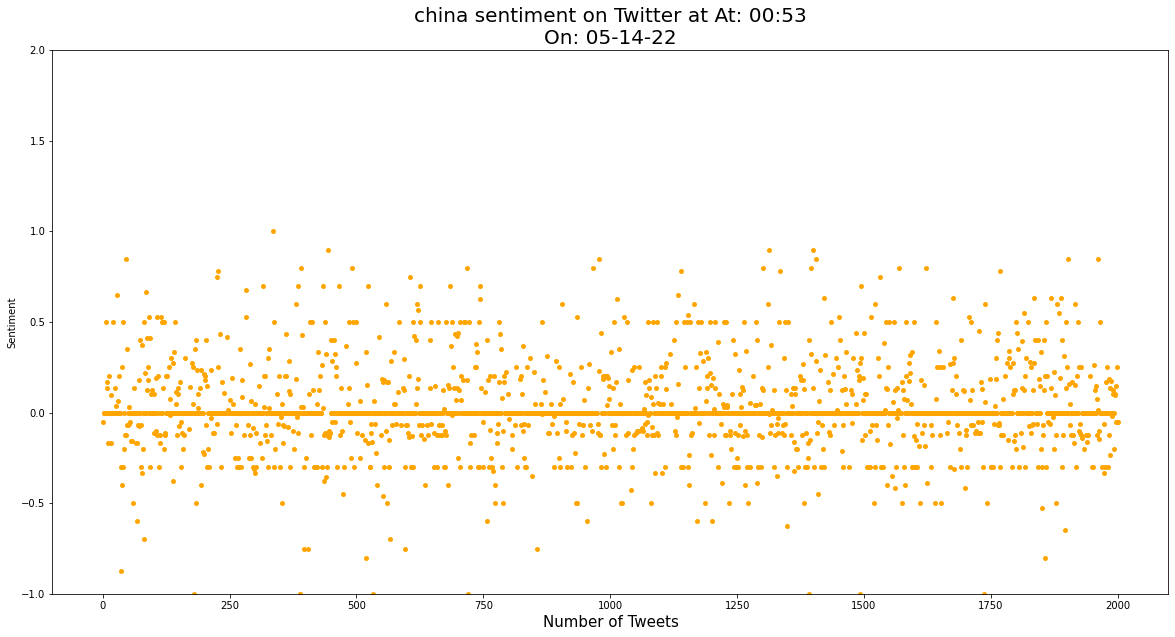



average polarity =  0.02387409577058503


In [64]:
#Plotting
plt.figure(figsize = (20,10))

#time to mention when this was done.
time  = datetime.now().strftime("At: %H:%M\nOn: %m-%d-%y")

axes = plt.gca()
axes.set_ylim([-1, 2])
plt.scatter(numbers_list, polarity_list, c='orange',linewidths = 2, marker =".")

plt.title(keyword + " sentiment on Twitter at " + time  ,fontsize = 20)
plt.xlabel("Number of Tweets",fontsize = 15)
plt.ylabel("Sentiment")
plt.show()


averagePolarity = (sum(polarity_list))/(len(polarity_list))
#averagePolarity = "{0:.0f}%".format(averagePolarity * 100)
print("\n\naverage polarity = " , averagePolarity)
